재활용 분석 시작...
재활용     135
사용       54
공장       36
배출       36
재활용품     36
자원       36
플라스틱     36
종이       36
쓰레기      36
원료       36
dtype: int64
재활용 분석 완료!
mask 변환 방식 1


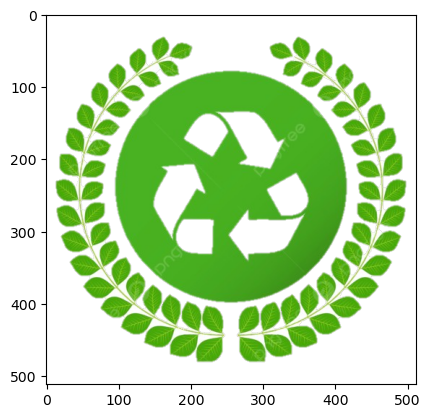

재활용_그림2_wordcloud.png 생성 완료!
mask 변환 방식 1


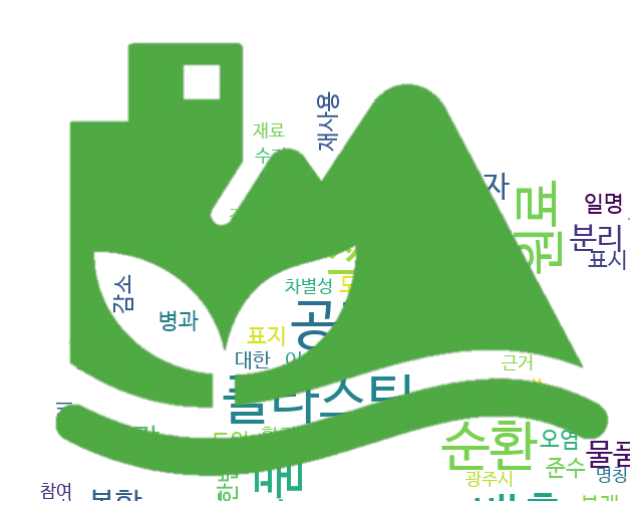

재활용_그림1_wordcloud.png 생성 완료!
mask 변환 방식 1


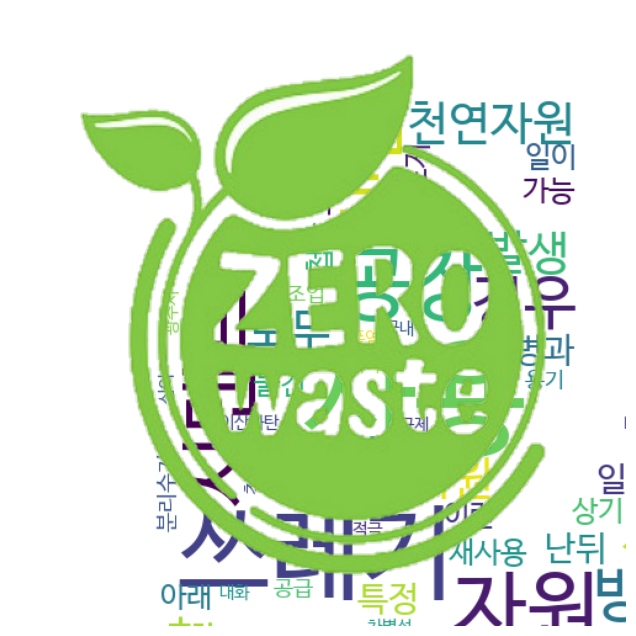

재활용_그림3_wordcloud.png 생성 완료!
친환경 분석 시작...
친환경    180
환경     126
화학      72
개발      72
문제      54
페인트     45
세대      36
바이오     36
소재      36
제품      36
dtype: int64
친환경 분석 완료!
mask 변환 방식 1


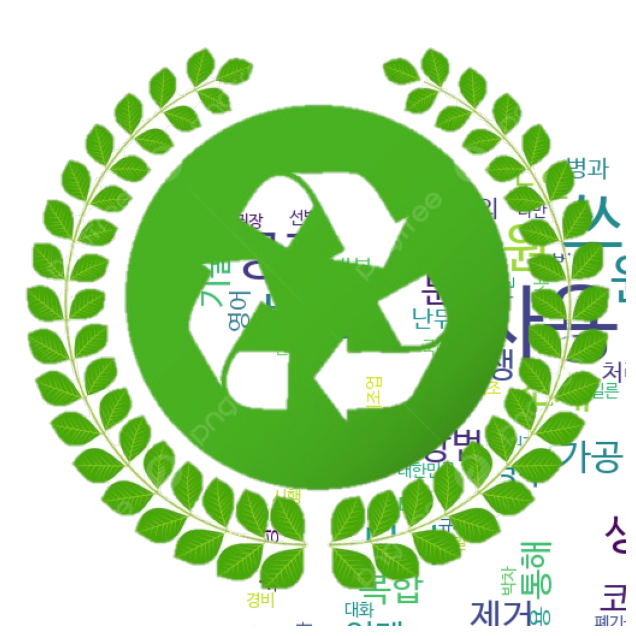

친환경_그림2_wordcloud.png 생성 완료!
mask 변환 방식 1


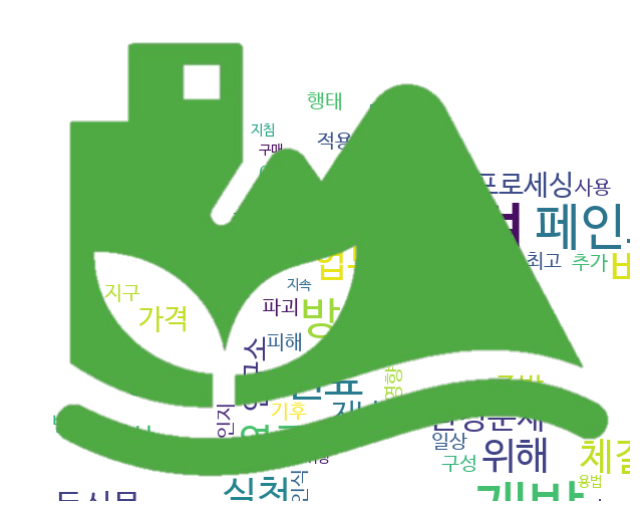

친환경_그림1_wordcloud.png 생성 완료!
mask 변환 방식 1


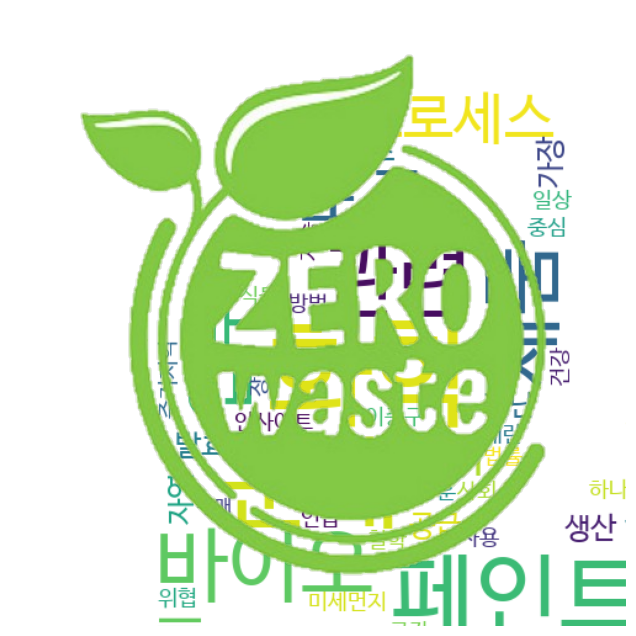

친환경_그림3_wordcloud.png 생성 완료!
제로웨이스트 분석 시작...
제로     36
이스트    36
모든     27
재사용    27
원칙     18
사용     18
재활용    18
제품     18
현재      9
습관      9
dtype: int64
제로웨이스트 분석 완료!
mask 변환 방식 1


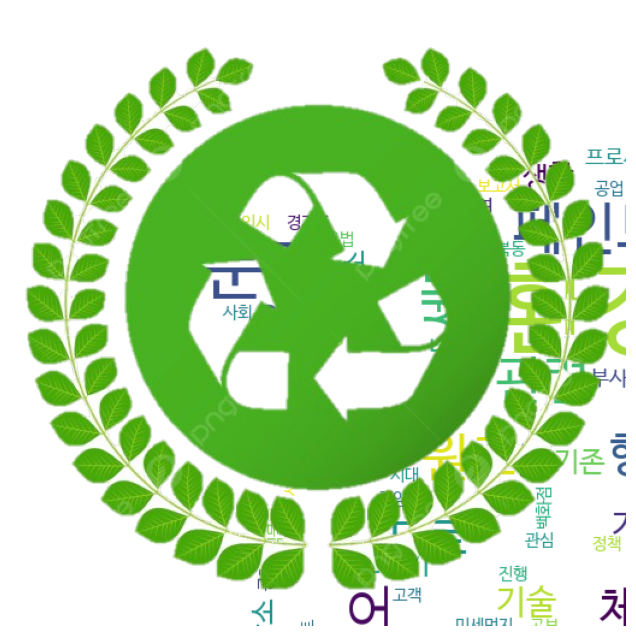

제로웨이스트_그림2_wordcloud.png 생성 완료!
mask 변환 방식 1


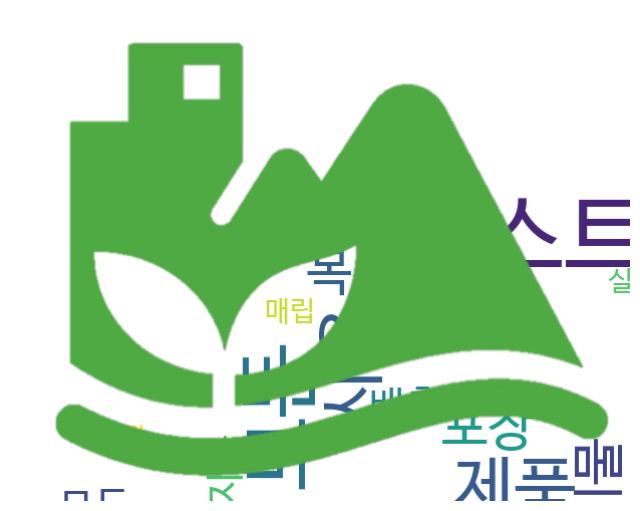

제로웨이스트_그림1_wordcloud.png 생성 완료!
mask 변환 방식 1


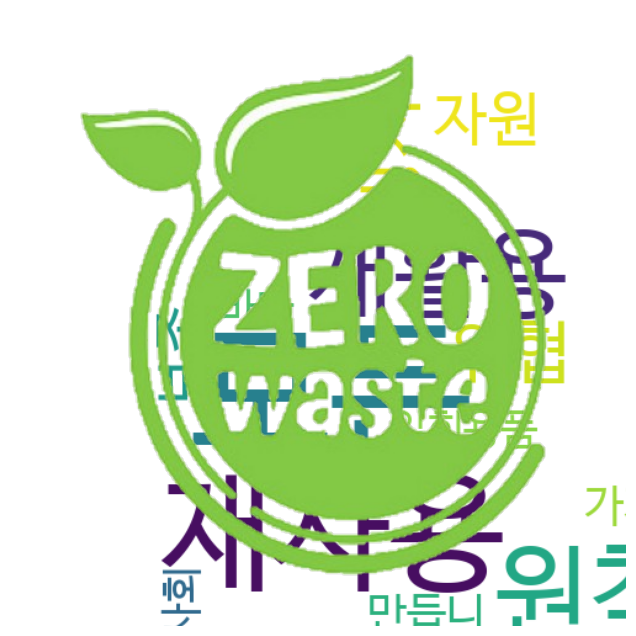

제로웨이스트_그림3_wordcloud.png 생성 완료!


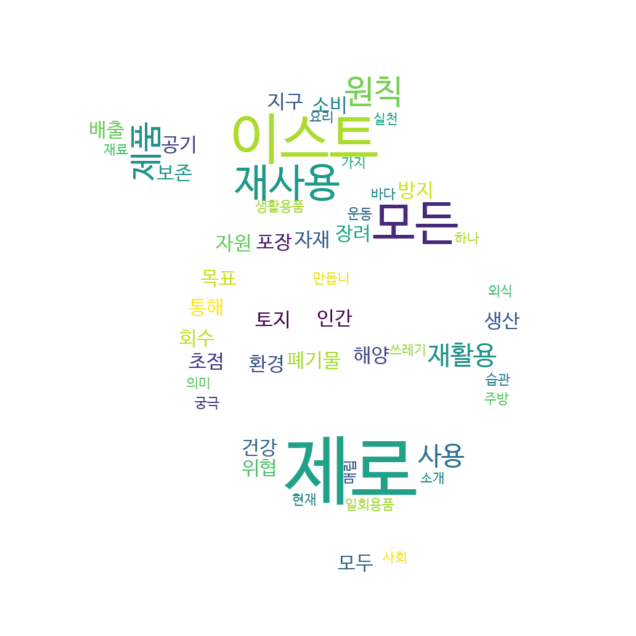

In [4]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd
from konlpy.tag import Okt
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

okt = Okt()

# 텍스트를 가져오는 함수
def get_text_from_page(keyword, page):
    session = requests.Session()
    url = f"https://search.naver.com/search.naver?where=view&sm=tab_jum&query={keyword}&start={page}"
    response = session.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    text = ' '.join([item.text for item in soup.select(".api_txt_lines")])
    return text

# 네이버에서 텍스트를 가져오는 함수
def get_text_from_naver(keyword, start=1, end=100):
    text = ""
    with ThreadPoolExecutor(max_workers=10) as executor:
        futures = [executor.submit(get_text_from_page, keyword, page) for page in range(start, end, 10)]
        for future in as_completed(futures):
            text += future.result()
    return text

# 텍스트를 분석하는 함수
def analyze_text(text, exclude_words):
    words = okt.nouns(text)
    word_counts = Counter(words)
    word_counts = {word: count for word, count in word_counts.items() if len(word) > 1 and word not in exclude_words}
    word_list = pd.Series(word_counts).sort_values(ascending=False)
    print(word_list.head(10))  # 상위 10개의 단어 출력
    return word_counts

# 워드 클라우드를 시각화하는 함수
def visualize_word_cloud(word_counts, mask, filename):
    if len(word_counts) > 0:
        wc = WordCloud(font_path='NanumBarunGothic.ttf', mask=mask, background_color="white", width=400, height=400, scale=2.0, max_font_size=250)
        gen = wc.generate_from_frequencies(word_counts)
        plt.figure(figsize=(8, 8))
        plt.imshow(gen, interpolation='bilinear')
        plt.axis('off')
        plt.savefig(filename, bbox_inches='tight')
    else:
        print(f"No words found for {filename}")

keywords = ['재활용', '친환경', '제로웨이스트']
exclude_words = {'단어1', '단어2', '단어3'}  # 제외할 단어 목록
image_names = ['그림2.png', '그림1.png', '그림3.png']

for keyword in keywords:
    print(f"{keyword} 분석 시작...")
    text = get_text_from_naver(keyword)
    word_counts = analyze_text(text, exclude_words)
    print(f"{keyword} 분석 완료!")
    
    for image_name in image_names:
        target_image = Image.open(image_name)
        try:
            mask = Image.new('RGB', target_image.size, (255, 255, 255))
            mask.paste(target_image, target_image)
            mask = np.array(mask)
            print("mask 변환 방식 1")
        except:
            print(image_name)
            mask = np.array(Image.open(image_name))
            print("mask 변환 방식 2")
        finally:
            plt.imshow(target_image)
            plt.show()
        
        filename = f"{keyword}_{image_name.split('.')[0]}_wordcloud.png"
        visualize_word_cloud(word_counts, mask, filename)
        print(f"{filename} 생성 완료!")
